## Langchain fundamentals

Langchain is a LLM appplication development framework.

In an ocean of LLM and various apps that can be integrated with it using various techniques , which is growing day by day. We need a framework where we can quickly prototype and generate cool applications with it.

Langchain consists of few modules:

1. Model
2. Prompt
3. Memory
4. Chain
5. Agents
6. Calbback
7. Indexes
   
### Models
Models cover most of the LLMs that can be loaded using langchain. Langchain has integrations with wide variety of commercial and open source models and their various versions

Example:

```python
# Importing modules 
from langchain.llms import OpenAI

#Here we are using text-ada-001 but you can change it 
llm = OpenAI(model_name="text-ada-001", n=2, best_of=2)

#Ask anything
llm("Tell me a joke")
```

### Prompt
Supports loading and creation of reusable prompt templates

Example:
```python
from langchain import PromptTemplate
# This template will act as a blue print for prompt

template = """
I want you to act as a naming consultant for new companies.
What is a good name for a company that makes {product}?
"""

prompt = PromptTemplate(
    input_variables=["product"],
    template=template,
)
prompt.format(product="colorful socks")
# -> I want you to act as a naming consultant for new companies.
# -> What is a good name for a company that makes colorful socks?
```


### Memory
Chains and agents in Langchain operate in a stateless mode by default, they handle each incoming query independently. But for some applications like Chatbot, we need historical data to be passed both over short and long term. That's why memory is required. LangChain provides memory components in two forms. First, LangChain provides helper utilities for managing and manipulating previous chat messages, which are designed to be modular and useful regardless of their use case. Second, LangChain offers an easy way to integrate these utilities into chains. This makes them highly versatile and adaptable to any situation.

```python
from langchain.memory import ChatMessageHistory

history = ChatMessageHistory()
history.add_user_message("hi!")

history.add_ai_message("whats up?")
history.messages
```

### Chains
Chains provide a means to merge various components into a unified application. As teh name suggests, chain, chains the model, prompt , memory, vectordbs, agents etc..

```python
#Here we are chaining everything
from langchain.chat_models import ChatOpenAI
from langchain.prompts.chat import (
    ChatPromptTemplate,
    HumanMessagePromptTemplate,
)
human_message_prompt = HumanMessagePromptTemplate(
        prompt=PromptTemplate(
            template="What is a good name for a company that makes {product}?",
            input_variables=["product"],
        )
    )
chat_prompt_template = ChatPromptTemplate.from_messages([human_message_prompt])
chat = ChatOpenAI(temperature=0.9)
# Temperature is about randomness in answer more the temp, random the answer
#Final Chain

chain = LLMChain(llm=chat, prompt=chat_prompt_template)
print(chain.run("colorful socks"))
```

### Agent
Using langchain, you can chain llm output to a tool, which can then execute, return the output to the model

Example:
```python
from langchain.agents import load_tools
from langchain.agents import initialize_agent
from langchain.agents import AgentType
from langchain.llms import OpenAI

llm = OpenAI(temperature=0)

tools = load_tools(["serpapi", "llm-math"], llm=llm)

agent = initialize_agent(tools, llm, agent=AgentType.ZERO_SHOT_REACT_DESCRIPTION, verbose=True)

agent.run("Who is Leo DiCaprio's girlfriend? What is her current age raised to the 0.43 power?")
```

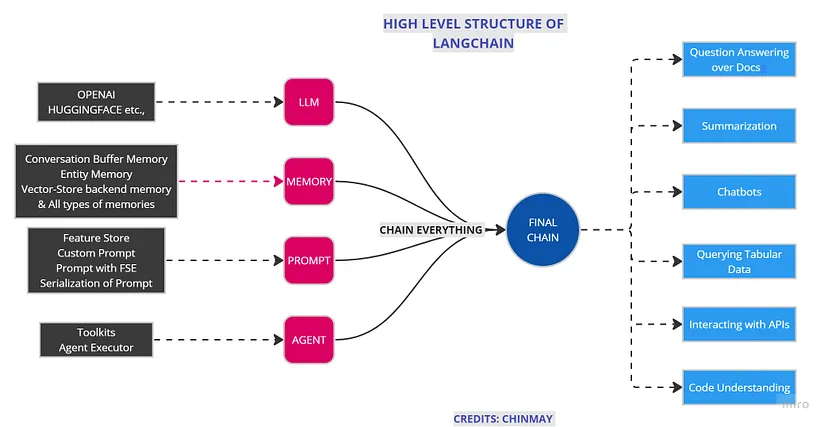